In [96]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

## Preprocessing

In [2]:
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
noID_application_df = application_df.drop(columns = ["EIN", "NAME"])

In [4]:
# Determine the number of unique values in each column.
noID_application_df[noID_application_df.columns].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
noID_application_df["APPLICATION_TYPE"].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    noID_application_df['APPLICATION_TYPE'] = noID_application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
noID_application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
noID_application_df["CLASSIFICATION"].value_counts(sort=False)

CLASSIFICATION
C1000    17326
C2000     6074
C3000     1918
C1200     4837
C2700      104
         ...  
C1248        1
C6100        1
C1820        1
C1900        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
unique_vals = noID_application_df["CLASSIFICATION"].value_counts(sort=False) #https://stackoverflow.com/questions/71873453/pandas-value-counts-and-unique-result-in-different-category-orders
unique_cats = noID_application_df["CLASSIFICATION"].unique()

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
classifications_to_replace = [unique_cats[i] for i in range(0,len(unique_vals)) if unique_vals.iloc[i] < 1000]

# Replace in dataframe
for classification in classifications_to_replace:
    noID_application_df['CLASSIFICATION'] = noID_application_df['CLASSIFICATION'].replace(classification,"Other")

# Check to make sure replacement was successful
noID_application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_target_cols = noID_application_df.drop(columns=["ASK_AMT","IS_SUCCESSFUL"]).columns

# Module 19; Lesson 2; Activity 4
#https://stackoverflow.com/questions/77643432/why-is-pd-get-dummies-returning-boolean-values-instead-of-the-binaries-of-0-1
dummies = pd.get_dummies(noID_application_df[categorical_target_cols], dtype = int) 

In [11]:
#combine non-categorical columns with new dummy columns
final_df = pd.concat([dummies, noID_application_df[["ASK_AMT","IS_SUCCESSFUL"]]], axis = 1) # Module 19; Lesson 2; Activity 4
final_df.shape

(34299, 44)

In [12]:
# Split our preprocessed data into our features and target arrays
X = final_df.drop(columns=["IS_SUCCESSFUL"])
y = final_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [129]:
#Instantiate neural network model
#Module 21; Lesson 1; Activity 2
nn = tf.keras.models.Sequential()

#add input layer
input_dims = X_train_scaled.shape[1]
nn.add(tf.keras.layers.Dense(units = 120, activation = 'relu', input_dim = input_dims))

# First hidden layer
nn.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [130]:
# Check the structure of the model
nn.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_115 (Dense)               │ (None, 120)            │         5,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 20)             │         2,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,141 (31.80 KB)

 Trainable params: 8,141 (31.80 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# callback to record model weights at intervals of five training epochs.
weights_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = 'model_weights.weights.h5', 
                                                        save_weights_only=True, 
                                                        save_freq=5) #https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

# callback to save the best model, determined by maximum accuracy, per call of model.fit()
metric = 'val_accuracy'
best_model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = 'best_model.keras', 
                                                           save_best_only = True, 
                                                           monitor = metric,
                                                           mode = 'max')#https://www.geeksforgeeks.org/tf-keras-callbacks-callback-tensorflow-callbacks/

In [158]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [159]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 100, callbacks = [weights_checkpoint,best_model_checkpoint])

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7382 - loss: 0.5329
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7419 - loss: 0.5302
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7427 - loss: 0.5243
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7391 - loss: 0.5295
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7390 - loss: 0.5308
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7432 - loss: 0.5278
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7362 - loss: 0.5355
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7409 - loss: 0.5279
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7440 - loss: 0.5190
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7419 - loss: 0.5283
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7399 - loss: 0.5267
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [160]:
loaded_model = tf.keras.models.load_model('best_model.keras')

ValueError: File not found: filepath=best_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [154]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 385us/step - accuracy: 0.7248 - loss: 0.7772
Loss: 0.7772384285926819, Accuracy: 0.724781334400177


In [76]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')

In [123]:
loss_df = pd.DataFrame(fit_model.history)
loss_df.index += 1

accuracy_df = pd.DataFrame(fit_model.history)
accuracy_df.index += 1

(<Axes: >, <Axes: >)

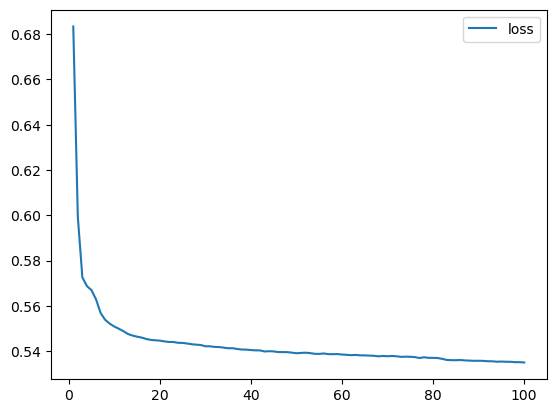

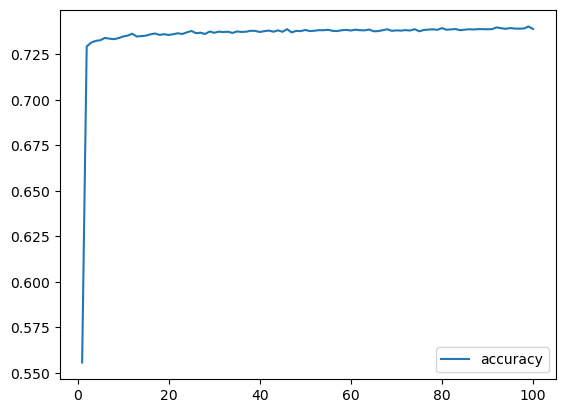

In [124]:
loss_plot = loss_df.plot(kind='line', y = 'loss')
accuracy_plot = accuracy_df.plot(kind='line', y = 'accuracy')

loss_plot, accuracy_plot